In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv('Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States.csv')
# Clean data
data = data.drop(['INDICATOR', 'UNIT', 'UNIT_NUM','STUB_NAME_NUM','STUB_LABEL_NUM'
                 ,'YEAR_NUM','AGE_NUM','FLAG'], axis=1)

# Rename columns
data.columns 
data = data.dropna()




In [3]:
# Rename the columns
# data.columns = ['Indicator', 'Age', 'Year', 'Sex', 'Race', 'DeathRate']
# data
print("Before")
print(data.isnull().sum())
data = data.dropna()
print("After")
print(data.isnull().sum())

Before
STUB_NAME     0
STUB_LABEL    0
YEAR          0
AGE           0
ESTIMATE      0
dtype: int64
After
STUB_NAME     0
STUB_LABEL    0
YEAR          0
AGE           0
ESTIMATE      0
dtype: int64


In [4]:
data

,STUB_NAME,STUB_LABEL,YEAR,AGE,ESTIMATE
0,Total,All persons,1950,All ages,13.2
1,Total,All persons,1960,All ages,12.5
2,Total,All persons,1970,All ages,13.1
3,Total,All persons,1980,All ages,12.2
4,Total,All persons,1981,All ages,12.3
...,...,...,...,...,...
6385,"Sex, age and race and Hispanic origin (Single ...",Female: Not Hispanic or Latino: Black or Afric...,2018,65 years and over,1.3
6386,"Sex, age and race and Hispanic origin (Single ...",Female: Hispanic or Latino: All races: 15-24 y...,2018,15-24 years,4.1
6387,"Sex, age and race and Hispanic origin (Single ...",Female: Hispanic or Latino: All races: 25-44 y...,2018,25-44 years,4.4
6388,"Sex, age and race and Hispanic origin (Single ...",Female: Hispanic or Latino: All races: 45-64 y...,2018,45-64 years,3.2


In [5]:

# Show the first few rows of the DataFrame
print("few columns      ",data.head())
print(" ")

# Get summary statistics for the columns
print("Summary statistics      ",data.describe())
print(" ")

# Check for missing values
print("Number of missing values     ",data.isna().sum())
print(" ")

# Check the data types of the columns
print("Data types of columns      ",data.dtypes)
print(" ")


few columns         STUB_NAME   STUB_LABEL  YEAR       AGE  ESTIMATE
0     Total  All persons  1950  All ages      13.2
1     Total  All persons  1960  All ages      12.5
2     Total  All persons  1970  All ages      13.1
3     Total  All persons  1980  All ages      12.2
4     Total  All persons  1981  All ages      12.3
 
Summary statistics                     YEAR     ESTIMATE
count  5484.000000  5484.000000
mean   1999.677972    13.709810
std      13.584097    11.531805
min    1950.000000     0.300000
25%    1991.000000     5.000000
50%    2002.000000    10.500000
75%    2010.000000    19.500000
max    2018.000000    74.800000
 
Number of missing values      STUB_NAME     0
STUB_LABEL    0
YEAR          0
AGE           0
ESTIMATE      0
dtype: int64
 
Data types of columns       STUB_NAME      object
STUB_LABEL     object
YEAR            int64
AGE            object
ESTIMATE      float64
dtype: object
 


# Exploratory Data Analysis

In [6]:
data['STUB_NAME'].value_counts()

Sex, age and race                                      1282
Sex and age                                            1174
Sex, age and race and Hispanic origin                   952
Sex and race                                            624
Age                                                     588
Sex and race and Hispanic origin                        512
Sex                                                     168
Total                                                    84
Sex, age and race and Hispanic origin (Single race)      39
Sex, age and race (Single race)                          27
Sex and race and Hispanic origin (Single race)           22
Sex and race (Single race)                               12
Name: STUB_NAME, dtype: int64

In [7]:
data['STUB_LABEL'].value_counts()

Female: Black or African American                                                       87
Male: White                                                                             86
Female: White                                                                           86
Male: Black or African American                                                         85
All persons                                                                             84
                                                                                        ..
Male: Not Hispanic or Latino: Native Hawaiian or Other Pacific Islander: 25-44 years     1
Female: Not Hispanic or Latino: Asian: 15-24 years                                       1
Female: Not Hispanic or Latino: Asian: 25-44 years                                       1
Female: Not Hispanic or Latino: Asian: 45-64 years                                       1
Female: Not Hispanic or Latino: Asian: 65 years and over                                 1

In [8]:
data['YEAR'].value_counts()

2018    259
2017    159
2015    159
2016    158
2011    157
2008    157
2009    157
2014    157
2013    155
2010    155
2005    155
2003    154
2012    153
1999    153
2006    153
2004    153
2007    152
2002    152
2001    152
2000    152
1996    122
1998    121
1993    121
1995    120
1994    120
1992    120
1997    120
1991    119
1988    118
1990    118
1989    118
1985    118
1986    104
1987    104
1980     93
1984     81
1982     81
1981     81
1983     80
1970     76
1950     74
1960     73
Name: YEAR, dtype: int64

In [9]:
data['AGE'].value_counts()

All ages             1422
25-44 years           695
15-24 years           674
45-64 years           657
65 years and over     566
65-74 years           212
75-84 years           209
85 years and over     169
15-19 years           126
20-24 years           126
25-34 years           126
35-44 years           126
45-54 years           126
55-64 years           126
10-14 years           124
Name: AGE, dtype: int64

In [10]:
#Total estimates according to stub name 

grouped_df = data.groupby(['STUB_NAME'])[['ESTIMATE']].sum()
grouped_df

,ESTIMATE
STUB_NAME,
Age,8559.3
Sex,2079.2
Sex and age,18595.1
Sex and race,5848.4
Sex and race (Single race),151.6
Sex and race and Hispanic origin,5116.8
Sex and race and Hispanic origin (Single race),294.1
"Sex, age and race",20106.5
"Sex, age and race (Single race)",487.7


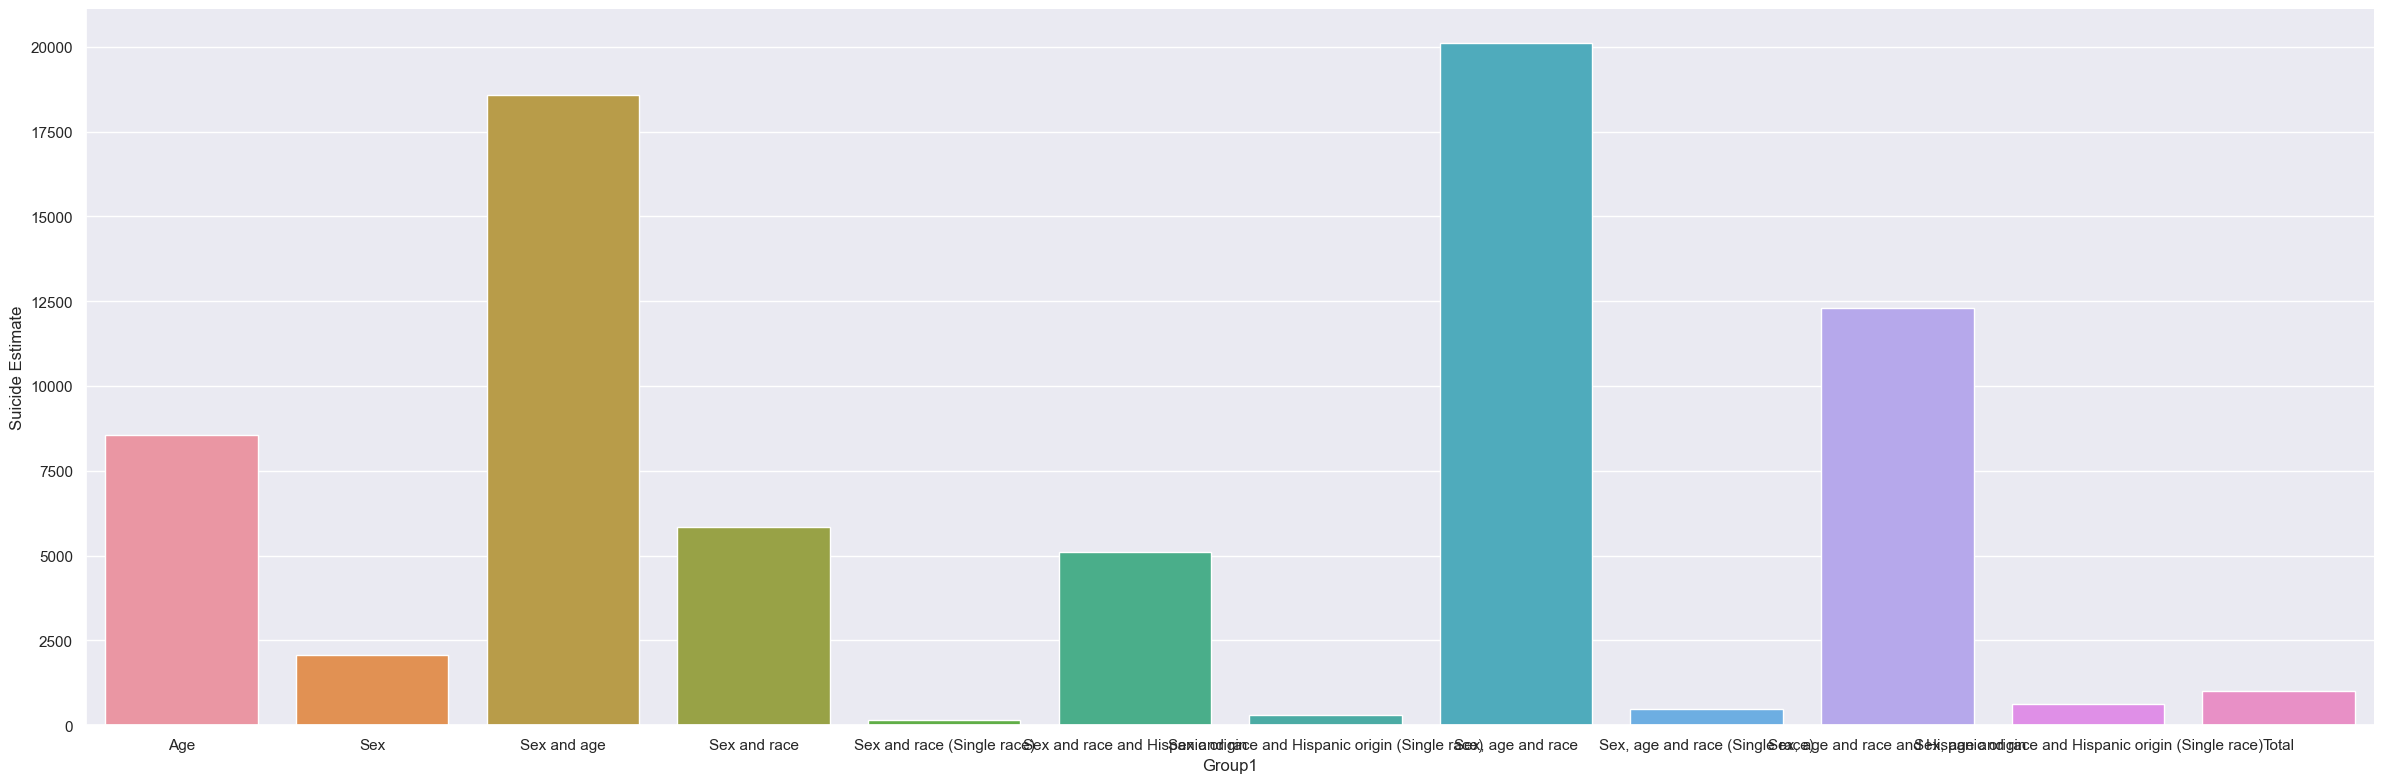

In [11]:
sns.set(style="darkgrid") 

# create the plot
sns.catplot(x='STUB_NAME', y='ESTIMATE', kind='bar', data=data.groupby(['STUB_NAME'])[['ESTIMATE']].sum().reset_index(), height=8, aspect=3)

# set the x and y labels
plt.xlabel('Group1')
plt.ylabel('Suicide Estimate')

# show the plot
plt.show()


In [12]:
#Total estimates according to stub label 

grouped_df = data.groupby('STUB_LABEL')['ESTIMATE'].sum()
grouped_df

STUB_LABEL
10-14 years                         59.2
15-19 years                        367.0
15-24 years                        475.6
20-24 years                        581.7
25-34 years                        602.3
                                   ...  
Male: White: 45-64 years          1224.8
Male: White: 65 years and over    1616.4
Male: White: 65-74 years          1322.4
Male: White: 75-84 years          1956.4
Male: White: 85 years and over    2514.5
Name: ESTIMATE, Length: 150, dtype: float64

In [13]:
data.groupby('AGE')['ESTIMATE'].sum()

AGE
10-14 years            176.2
15-19 years           1089.7
15-24 years           8218.6
20-24 years           1733.5
25-34 years           1804.8
25-44 years           9484.8
35-44 years           1961.3
45-54 years           2151.5
45-64 years           8346.9
55-64 years           2088.9
65 years and over     8531.5
65-74 years           3917.5
75-84 years           5343.2
85 years and over     5831.3
All ages             14504.9
Name: ESTIMATE, dtype: float64

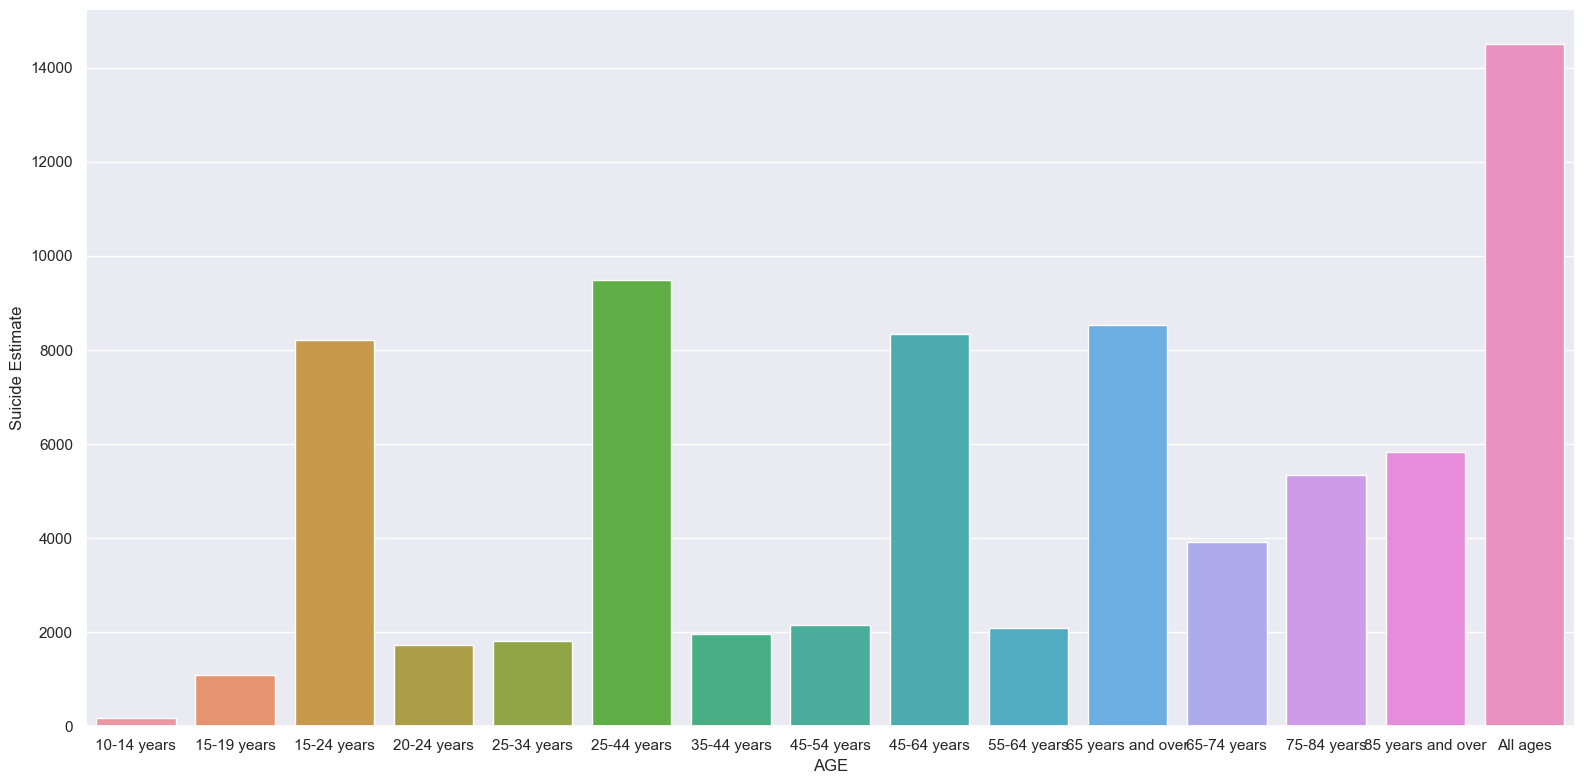

In [14]:
#sns.set(style="darkgrid") 

# create the plot
sns.catplot(x='AGE', y='ESTIMATE', kind='bar', data=data.groupby(['AGE'])[['ESTIMATE']].sum().reset_index(), height=8, aspect=2)

# set the x and y labels
plt.xlabel('AGE')
plt.ylabel('Suicide Estimate')

# show the plot
plt.show()



In [15]:
data.groupby('YEAR')['ESTIMATE'].sum()

YEAR
1950    1259.3
1960    1180.5
1970    1181.2
1980    1394.0
1981    1207.3
1982    1224.4
1983    1245.7
1984    1266.9
1985    1775.0
1986    1653.4
1987    1657.7
1988    1796.1
1989    1810.5
1990    1816.6
1991    1808.3
1992    1725.8
1993    1764.8
1994    1746.4
1995    1703.4
1996    1654.7
1997    1611.7
1998    1592.9
1999    1813.1
2000    1779.4
2001    1795.0
2002    1815.1
2003    1787.4
2004    1867.3
2005    1825.2
2006    1818.6
2007    1833.3
2008    1885.9
2009    1920.6
2010    1985.1
2011    1978.3
2012    2033.5
2013    2053.6
2014    2111.2
2015    2214.2
2016    2267.4
2017    2363.6
2018    3960.2
Name: ESTIMATE, dtype: float64

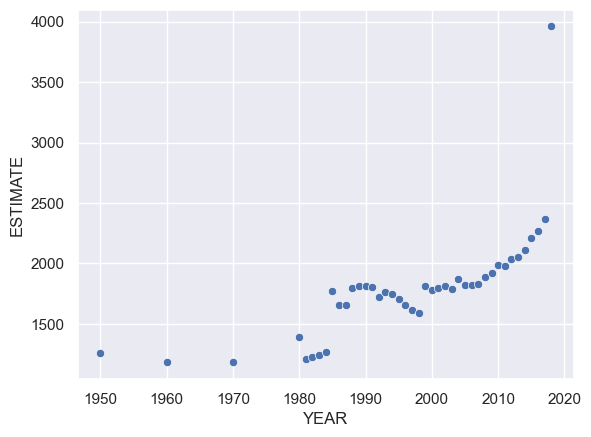

In [16]:
sns.scatterplot(data=data.groupby('YEAR')['ESTIMATE'].sum().reset_index(),
                x='YEAR', y='ESTIMATE')
plt.show()

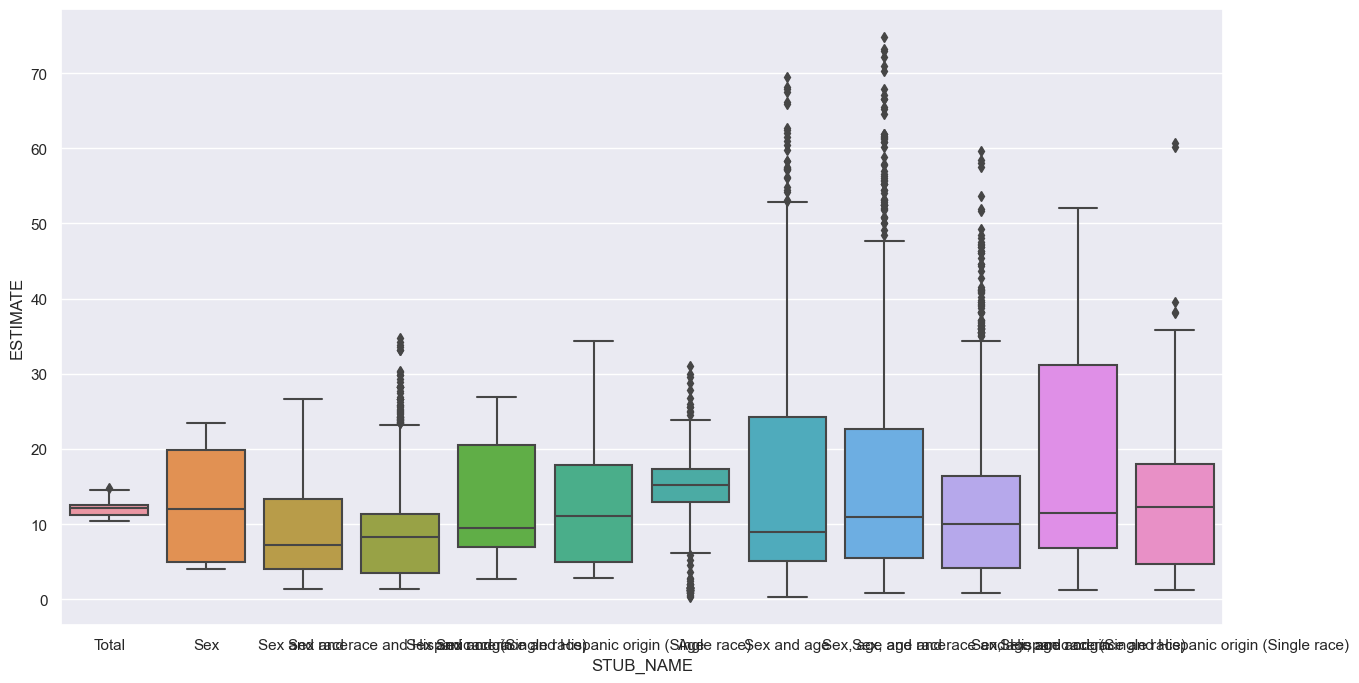

In [17]:
# Check for outliers and handle them accordingly

plt.figure(figsize=(15, 8))

sns.boxplot(x='STUB_NAME', y='ESTIMATE', data=data)

plt.show()


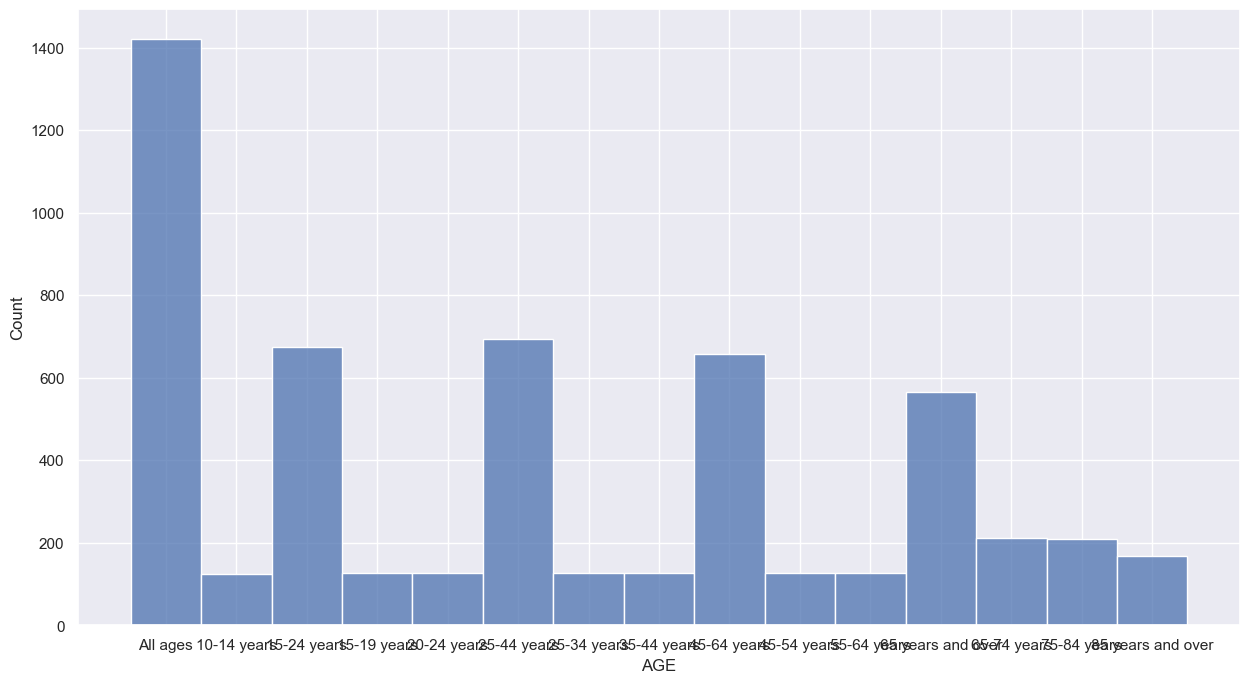

In [18]:
# Visualize the distribution of each variable

plt.figure(figsize=(15, 8))


sns.histplot(data['AGE'])

plt.show()


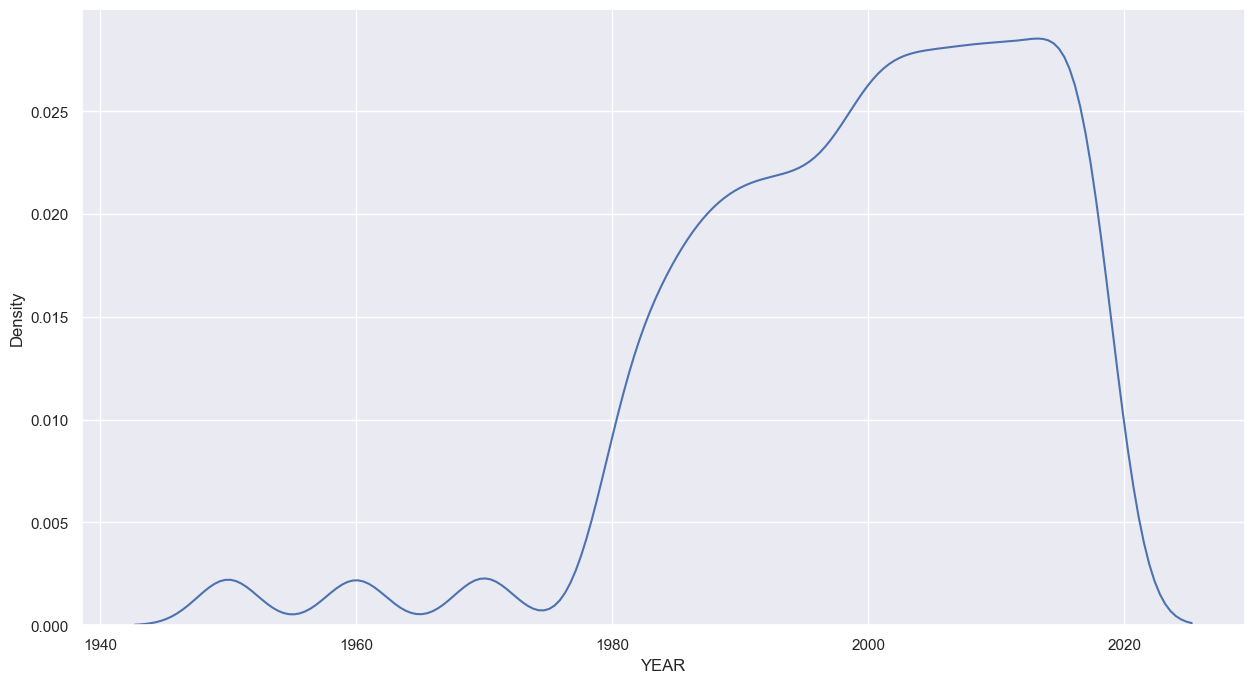

In [19]:

plt.figure(figsize=(15, 8))


sns.kdeplot(data['YEAR'])

plt.show()


In [20]:
# Calculate correlation coefficients between variables

data.corr()



C:\Users\ahsan\AppData\Local\Temp\ipykernel_13680\1210747652.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,YEAR,ESTIMATE
YEAR,1.000000,-0.067331
ESTIMATE,-0.067331,1.000000


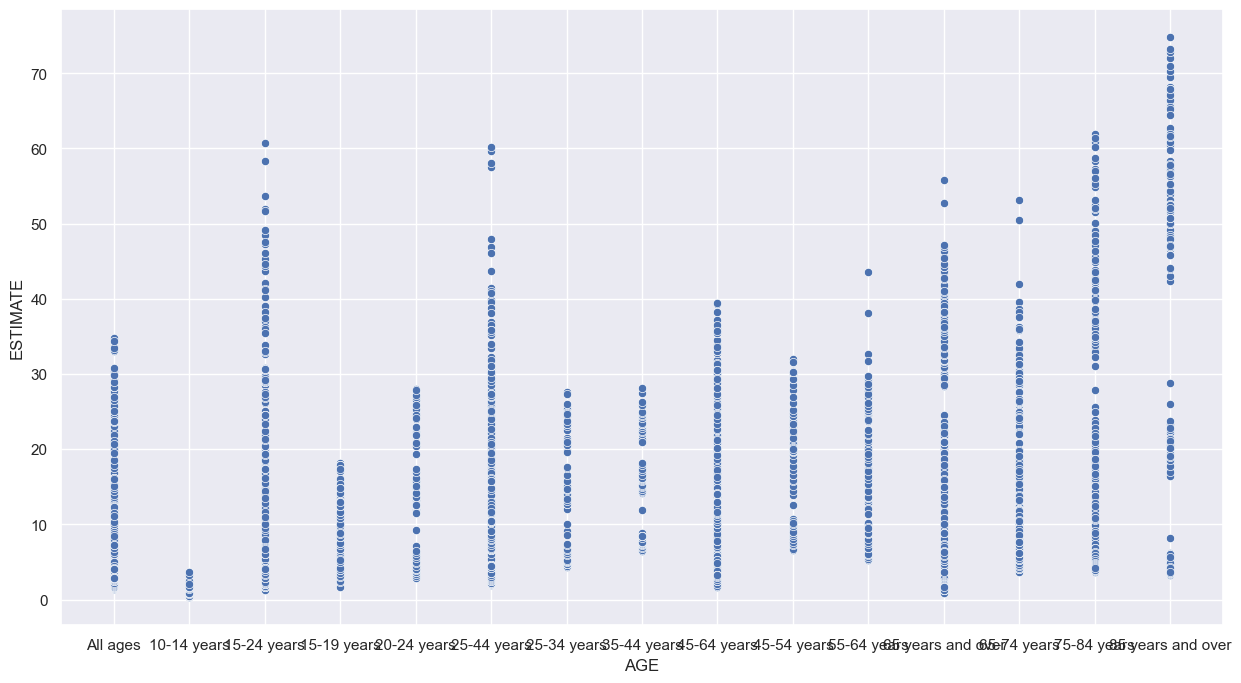

In [21]:
# Visualize the relationships between variables

plt.figure(figsize=(15, 8))

sns.scatterplot(x='AGE', y='ESTIMATE', data=data)

plt.show()


C:\Users\ahsan\AppData\Local\Temp\ipykernel_13680\4204336102.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


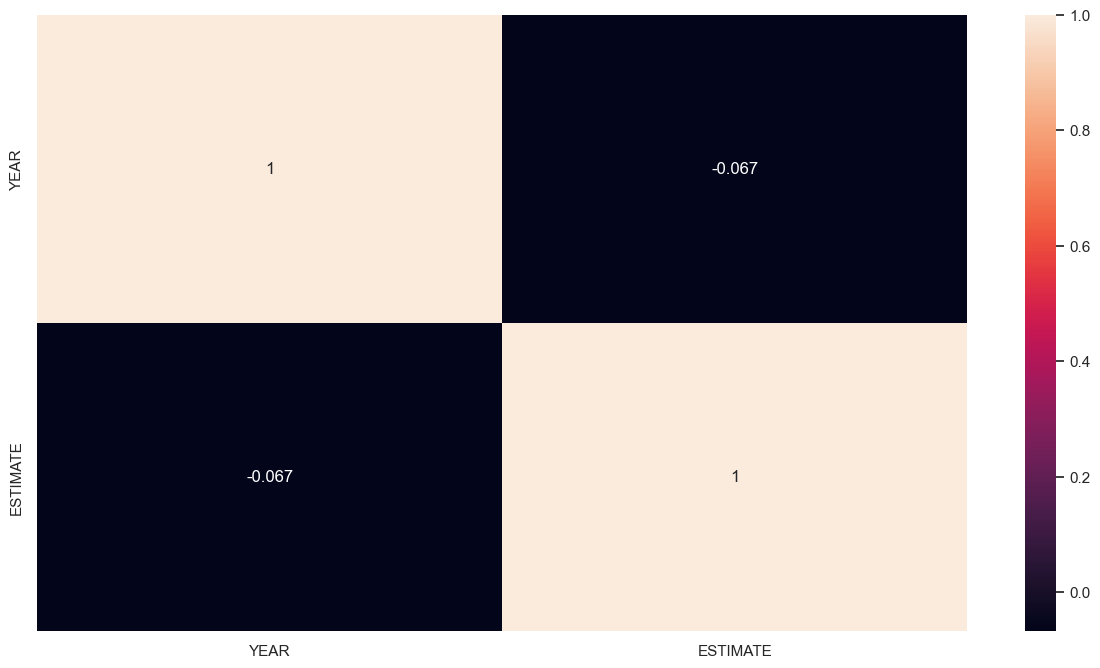

In [22]:
plt.figure(figsize=(15, 8))

sns.heatmap(data.corr(), annot=True)

plt.show()


<Figure size 1500x800 with 0 Axes>

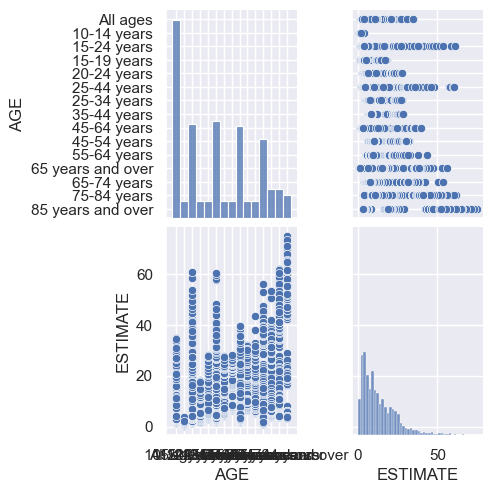

In [23]:

plt.figure(figsize=(15, 8))

# visualize the relationships between variables
sns.pairplot(data=data, vars=['AGE', 'ESTIMATE'])

plt.show() 
    

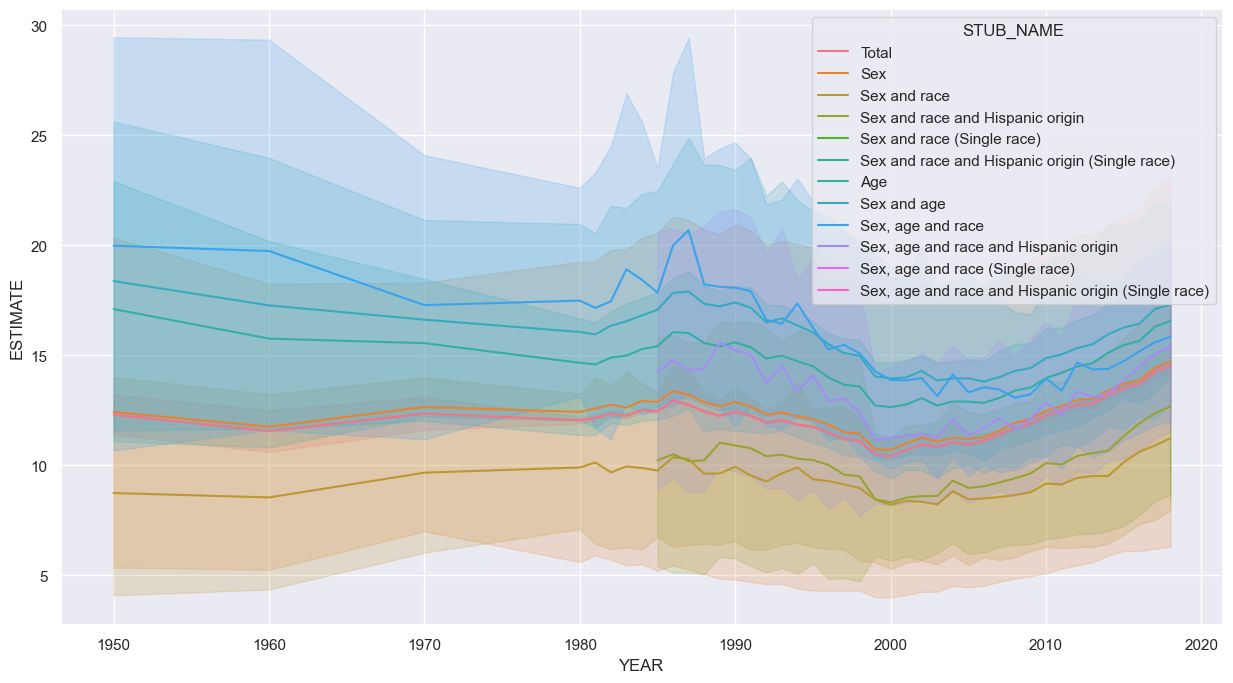

In [24]:

plt.figure(figsize=(15, 8))

sns.lineplot(x='YEAR', y='ESTIMATE', hue='STUB_NAME', data=data)

plt.show()



In [25]:
data.columns

Index(['STUB_NAME', 'STUB_LABEL', 'YEAR', 'AGE', 'ESTIMATE'], dtype='object')

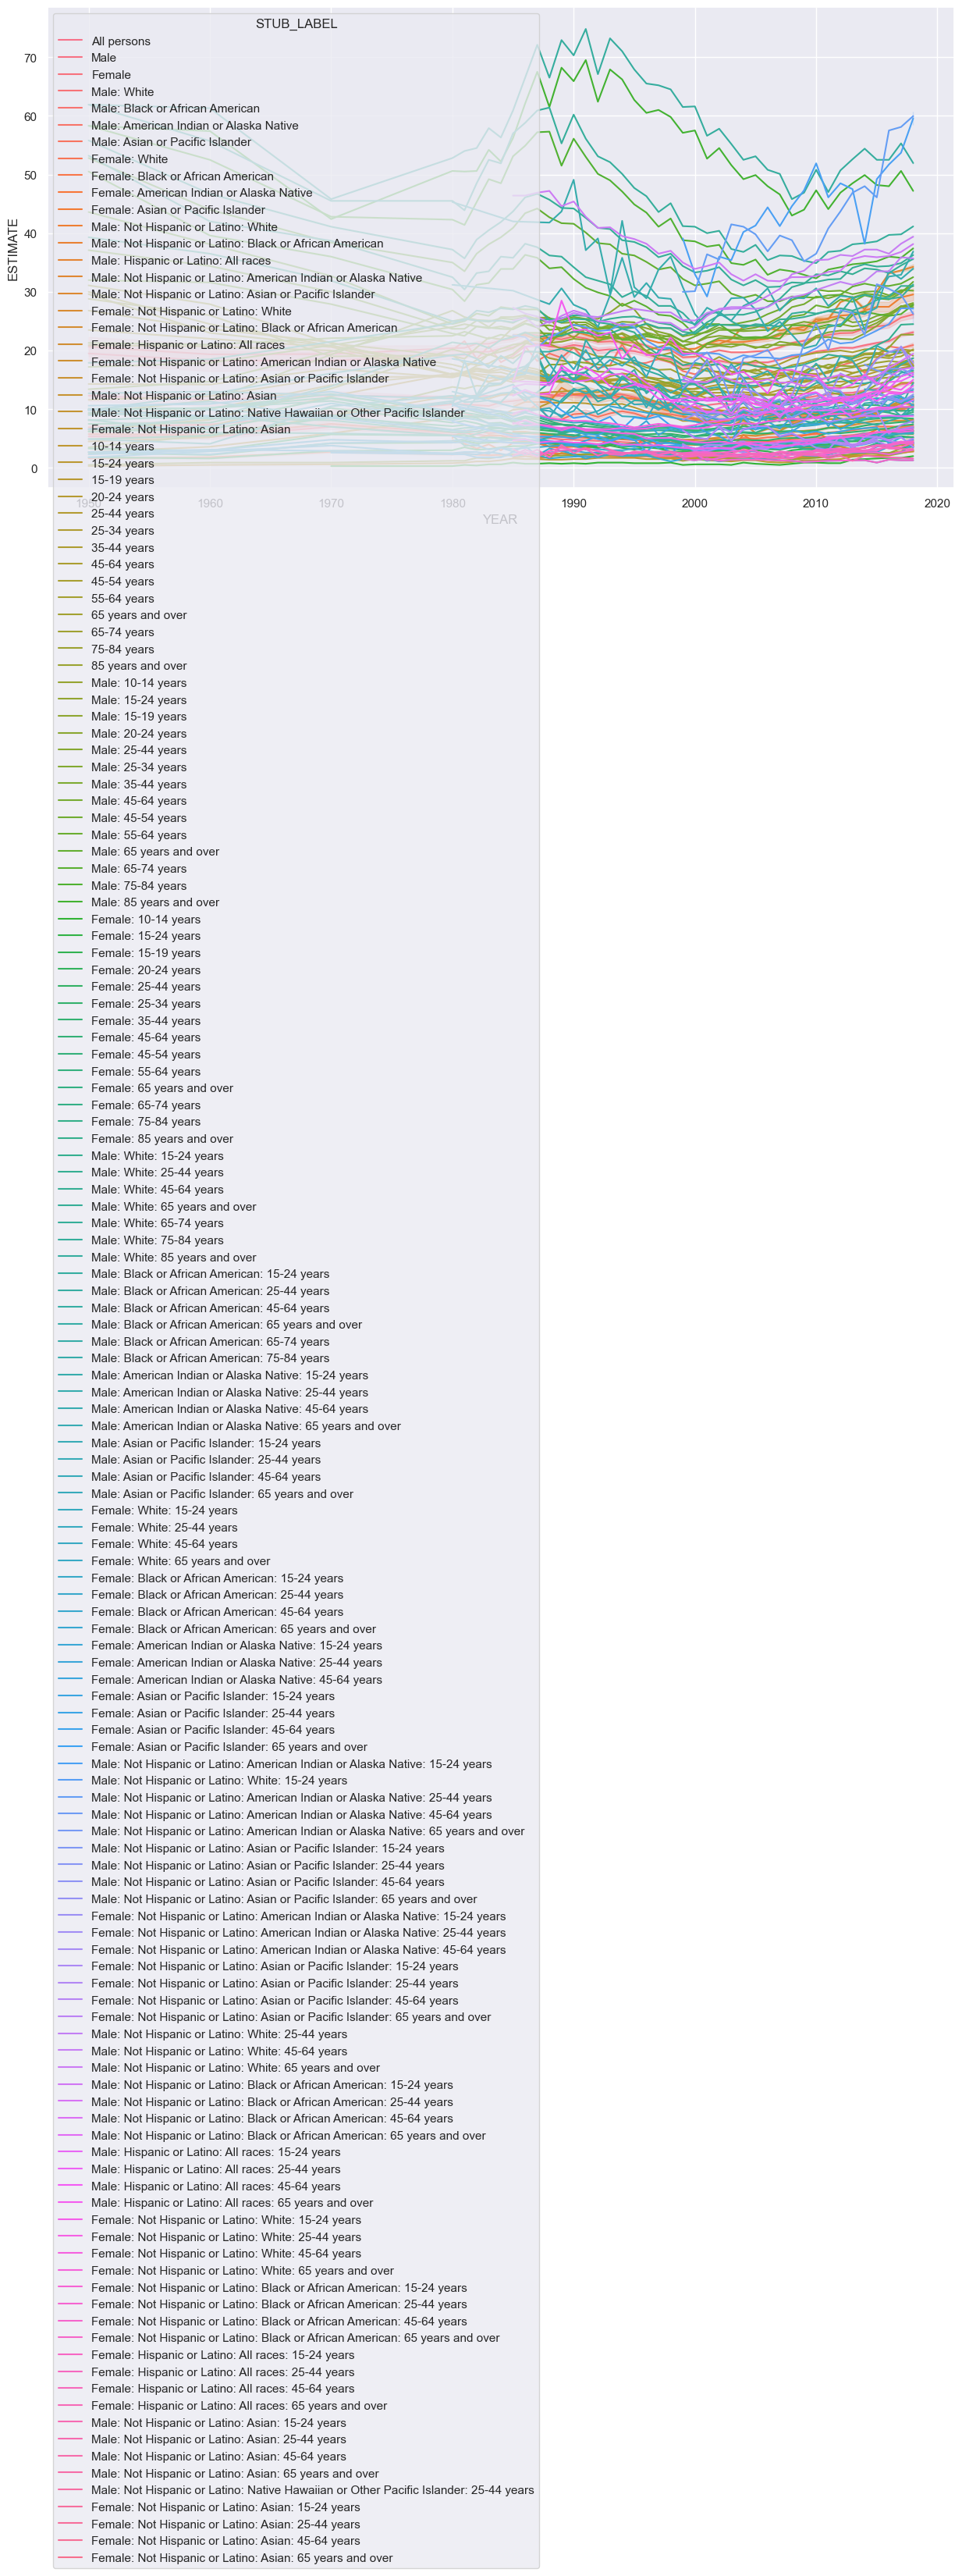

In [26]:

plt.figure(figsize=(15, 8))

sns.lineplot(x='YEAR', y='ESTIMATE', hue='STUB_LABEL', data=data)

plt.show()



In [27]:
 # Importing the adfuller function
import pandas as pd 
from statsmodels.tsa.stattools import adfuller
# Extracting the 'ESTIMATE' column from the 'data' DataFrame 
data1 = data['ESTIMATE'] 
#Performing the Augmented Dickey-Fuller (ADF) test
result = adfuller(data1)
p_value = result[1] 
print("ADF p-value:", p_value) 

if p_value < 0.05:
    print("The data is stationary.") 
else:
    print("The data is non-stationary.") 

ADF p-value: 1.652606604652776e-06
The data is stationary.


In [28]:
from sklearn.model_selection import train_test_split 
import pmdarima as pm 
from statsmodels.tsa.arima.model import ARIMA 
# Extracting features from 'data' DataFrame
X = data[['STUB_NAME', 'STUB_LABEL', 'YEAR', 'AGE']]  
# Extracting target variable 'ESTIMATE' from 'data' DataFrame 
y = data['ESTIMATE'] 
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
# Creating an ARIMA model with the extracted order
model = pm.auto_arima(y_train, seasonal=False, suppress_warnings=True) 
p, d, q = model.order 
arima_model = ARIMA(y_train, order=(p, d, q)) 
trained_model = arima_model.fit() 

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [29]:
import pmdarima as pm 
from sklearn.metrics import mean_squared_error 
import warnings 
warnings.filterwarnings("ignore") 
 # Variable to store the best parameters
p_values = range(0, 3) 
d_values = range(0, 3)
q_values = range(0, 3) 
best_params = None
lowest_mse = float('inf') 
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                 # Creating an ARIMA model
                model = ARIMA(y_train, order=(p, d, q))
                # Fitting the ARIMA model
                trained_model = model.fit() 
                y_pred = trained_model.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)  
                mse = mean_squared_error(y_test, y_pred) 
                print("ARIMA Parameters:", (p, d, q))
                print("Mean Squared Error (MSE):", mse)
                # Checking if the current MSE is the lowest
                if mse < lowest_mse:  
                    best_params = (p, d, q)  
                    lowest_mse = mse 
            except:
                continue

        arima_model = ARIMA(y_train, order=best_params) 
        trained_model = arima_model.fit()

        print("Best ARIMA Parameters:", best_params)
        print("Lowest Mean Squared Error (MSE):", lowest_mse)


ARIMA Parameters: (0, 0, 0)
Mean Squared Error (MSE): 121.37784008509003
ARIMA Parameters: (0, 0, 1)
Mean Squared Error (MSE): 121.37795800579086
ARIMA Parameters: (0, 0, 2)
Mean Squared Error (MSE): 121.37804914570289
Best ARIMA Parameters: (0, 0, 0)
Lowest Mean Squared Error (MSE): 121.37784008509003
ARIMA Parameters: (0, 1, 0)
Mean Squared Error (MSE): 126.2516226071103
ARIMA Parameters: (0, 1, 1)
Mean Squared Error (MSE): 121.81556819230873
ARIMA Parameters: (0, 1, 2)
Mean Squared Error (MSE): 121.79196695214729
Best ARIMA Parameters: (0, 0, 0)
Lowest Mean Squared Error (MSE): 121.37784008509003
ARIMA Parameters: (0, 2, 0)
Mean Squared Error (MSE): 36229731.05986601
ARIMA Parameters: (0, 2, 1)
Mean Squared Error (MSE): 131.19767341785348
ARIMA Parameters: (0, 2, 2)
Mean Squared Error (MSE): 121.39378539146767
Best ARIMA Parameters: (0, 0, 0)
Lowest Mean Squared Error (MSE): 121.37784008509003
ARIMA Parameters: (1, 0, 0)
Mean Squared Error (MSE): 121.37795247618882
ARIMA Parameters:

In [30]:
from sklearn.metrics import mean_squared_error
y_pred = trained_model.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 121.37784008509003
Root Mean Squared Error (RMSE): 11.017161162708387


In [31]:
from flask import Flask, render_template, request

app = Flask(__name__)

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/estimate', methods=['POST'])
def get_estimate():
    # Get user input from the form
    stub_name = request.form['stub_name']
    stub_label = request.form['stub_label']
    year = int(request.form['year'])
    age = request.form['age']
    df = pd.DataFrame({
        'STUB_NAME': [stub_name],
        'STUB_LABEL': [stub_label],
        'YEAR': [year],
        'AGE': [age]
    })
    predicted_estimate = trained_model.predict(start=len(y_train), end=len(y_train) + len(df) - 1, exog=df[['STUB_NAME', 'STUB_LABEL', 'YEAR', 'AGE']])
    predicted_value = predicted_estimate.values[0]
    
    return render_template('estimate.html', estimate=predicted_value)

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=8000)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8000
 * Running on http://192.168.152.12:8000
Press CTRL+C to quit
127.0.0.1 - - [29/Jun/2023 18:30:27] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [29/Jun/2023 18:30:27] "GET /static/css/style.css HTTP/1.1" 200 -
127.0.0.1 - - [29/Jun/2023 18:30:27] "GET /favicon.ico HTTP/1.1" 404 -


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the data
data = pd.read_csv("Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States.csv")
data = data.drop(['INDICATOR', 'UNIT', 'UNIT_NUM','STUB_NAME_NUM','STUB_LABEL_NUM'
                 ,'YEAR_NUM','AGE_NUM','FLAG'], axis=1)

data=data.dropna()
categorical_cols = ['STUB_NAME', 'STUB_LABEL', 'YEAR', 'AGE']

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Separate the features and target variable
X = data_encoded.drop('ESTIMATE', axis=1)
y = data_encoded['ESTIMATE']

# Split the data into training and evaluation sets
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)

# Define new input data
new_data = pd.DataFrame({
    'STUB_NAME': ['Sex, age and race and Hispanic origin (Single race)'],
    'STUB_LABEL': ['Female: Not Hispanic or Latino: Asian: 65 years and over'],
    'YEAR': [3000],
    'AGE': ['65-74 years']
})

# Concatenate the training and evaluation sets with new data
combined_data = pd.concat([X_train, X_eval, new_data])

# Encode the combined dataset
combined_data_encoded = pd.get_dummies(combined_data, columns=categorical_cols)

# Separate the combined dataset back into training, evaluation, and new data
X_train_combined = combined_data_encoded[:X_train.shape[0]]
X_eval_combined = combined_data_encoded[X_train.shape[0]:X_train.shape[0] + X_eval.shape[0]]
new_data_combined = combined_data_encoded[-new_data.shape[0]:]

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_combined), columns=X_train_combined.columns)
X_eval_imputed = pd.DataFrame(imputer.transform(X_eval_combined), columns=X_eval_combined.columns)
new_data_imputed = pd.DataFrame(imputer.transform(new_data_combined), columns=new_data_combined.columns)

# Scale the data
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_imputed), columns=X_train_imputed.columns)
X_eval_scaled = pd.DataFrame(scaler.transform(X_eval_imputed), columns=X_eval_imputed.columns)
new_data_scaled = pd.DataFrame(scaler.transform(new_data_imputed), columns=new_data_imputed.columns)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the evaluation set
y_pred_eval = model.predict(X_eval_scaled)

# Calculate mean squared error for the evaluation set
mse_eval = mean_squared_error(y_eval, y_pred_eval)
print("Mean Squared Error (Evaluation set):", mse_eval)

# Make predictions on the new input data
y_pred_new = model.predict(new_data_scaled)

# Print the predicted values for the new input data
print("Estimated values for new data:")
print(y_pred_new)
# [13.79888548]

Mean Squared Error (Evaluation set): 6.456847801642008
Estimated values for new data:
[13.79888548]
